
Results after running experiment: 

Bandit/Website  1  Reward Estimate:  0.03636363636363637
Bandit/Website  1  Number of times chosen:  276.0
Bandit/Website  1  Cumulative Reward:  10.0
Bandit/Website  1  Cumulative Regret:  9990.0 

Bandit/Website  2  Reward Estimate:  0.13202534232577182
Bandit/Website  2  Number of times chosen:  4894.0
Bandit/Website  2  Cumulative Reward:  646.0
Bandit/Website  2  Cumulative Regret:  9354.0 

Bandit/Website  3  Reward Estimate:  0.08542713567839197
Bandit/Website  3  Number of times chosen:  200.0
Bandit/Website  3  Cumulative Reward:  17.0
Bandit/Website  3  Cumulative Regret:  9983.0 

Bandit/Website  4  Reward Estimate:  0.0198019801980198
Bandit/Website  4  Number of times chosen:  203.0
Bandit/Website  4  Cumulative Reward:  4.0
Bandit/Website  4  Cumulative Regret:  9996.0 

Bandit/Website  5  Reward Estimate:  0.15295978309986438
Bandit/Website  5  Number of times chosen:  4427.0
Bandit/Website  5  Cumulative Reward:  677.0
Bandit/Website

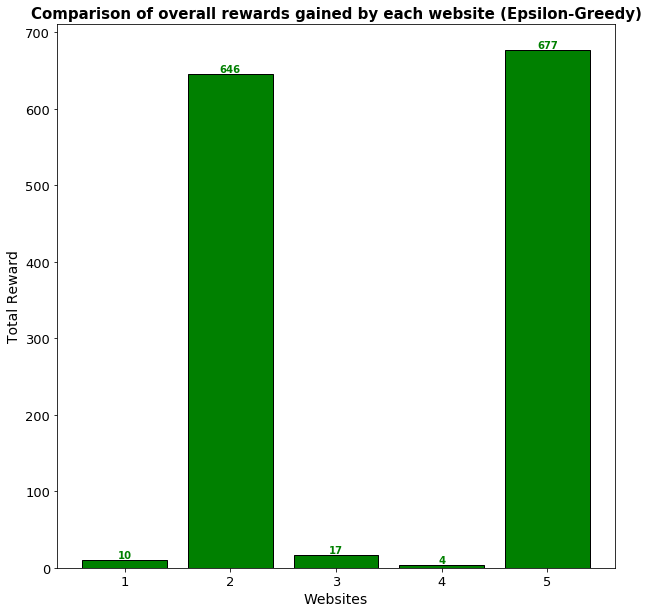

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random

# bandits/websites
k = 5

# total number of trials/rounds
rounds = 10000

# Reward estimates for each bandit/website
Q = np.zeros(k)

# Reward at specific trial 'n' for each bandit
R = np.zeros(k)

# Cumulative reward for each bandit/website
TR = np.zeros(k)

# Counts for each bandit/website being chosen
n = np.zeros(k)

# Reward probability for each bandit (Real values unknown to the learner)
rewardProb = [0.045, 0.12, 0.077, 0.012, 0.15]

#np.zeros(k)

# Random assignment of reward probabilities for each bandit/website and settting of R_n values to -1 for initiation
for i in range(0, k):
    R[i] = -1
    #rewardProb[i] = random.uniform(0, 1)
    #print ("Bandit/Website ", i+1, " reward probability: ", rewardProb[i])


# Epsilon (probability of exploring all bandits/websites with equal likelihood)
epsilon = 0.1

for i in range(0, rounds):

    # Random number to decide between exploration and exploitation
    choice = random.uniform(0, 1) 
    
    # Index is used for choosing a specific bandit/website out of the available options
    index = 0
    
    if(choice < (1 - epsilon)):
        # Exploit the best option
        index = np.argmax(Q)
    else:
        # Explore all bandits/websites
        index = random.randrange(k)

    Q_n = Q[index]
    R_n = R[index]
    count = n[index]
        
    # Reward = 1 if random number > bandit reward probability else 0
    reward = np.random.binomial(1, p = rewardProb[index])    
        
    # Calculate new estimate and cumulative reward for the bandit
    if count == 0: # Special check for first trial
        Q_new = 0
    else:
        # Formula: Q_n+1 = Q_n + [R_n - Q_n] / n (here n is stored in the varible 'count')
        Q_new = Q_n + (R_n - Q_n) / count   
    R_new = reward
        
    # Update values for the bandit/website
    Q[index] = Q_new
    R[index] = R_new
    n[index] += 1
    TR[index] += reward

# Display results for each bandit/website
print ("\nResults after running experiment: \n")

for i in range(0, k):
    print ("Bandit/Website ", i + 1, " Reward Estimate: ", Q[i])
    print ("Bandit/Website ", i + 1, " Number of times chosen: ", n[i])
    print ("Bandit/Website ", i + 1, " Cumulative Reward: ", TR[i])
    print ("Bandit/Website ", i + 1, " Cumulative Regret: ", rounds - TR[i], "\n")
    
    
websiteLabels = np.arange(1, k + 1, 1)    
plt.figure(figsize = (10, 10))
plt.bar(websiteLabels, TR, edgecolor = 'black', color = 'g')
plt.xlabel("Websites", fontsize = 14)
plt.ylabel("Total Reward", fontsize = 14)
plt.tick_params(labelsize = 13)
plt.title(f"Comparison of overall rewards gained by each website (Epsilon-Greedy)", fontsize = 15, fontweight = "bold")
for a, b in zip(websiteLabels, TR):
        plt.text(a, b, str(int(b)), ha = 'center', va = 'bottom', fontweight = "bold", color = 'g')
plt.show()

